## 拉钩网薪资预测
+ 1、读取拉勾网抓取的数据，制作职位需要相关技能的字典表表，尝试随机选取K个职位，并通过networkx绘制网络图
+ 2、使用PageRank算法，计算核心能力和核心职位的影响力，并排序
+ 3、将每条记录的内容拼接字符串，通过jieba分词，并转化为tfidf
+ 4、通过KNN进行模型训练并尝试用数据进行模型的结果进行预测；

In [6]:
from collections import defaultdict
import pandas as pd
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [4]:
# 显示中文
plt.rcParams['font.sans-serif']=u'SimHei'
plt.rcParams['axes.unicode_minus']=False

In [2]:
# 数据加载
file='jobs_4k.xls'
df=pd.read_excel(file)
df.head()

,id,positionName,district,stationname,jobNature,companyLabelList,industryField,salary,companySize,skillLables,createTime,companyFullName,workYear,education,positionAdvantage,url,detail,type
0,3,财务产品经理,海淀区,上地,全职,"['节日礼物', '年底双薪', '定期体检', '七险一金']","物流丨运输,软件开发",10k-15k,500-2000人,"['产品设计', '后台', 'B2B']",2020-05-15 15:10:02,北京福佑多多信息技术有限公司,1-3年,本科,福利待遇好、创业黑马、技术氛围好,https://www.lagou.com/jobs/7149613.html,岗位职责1、负责财务相关业务解决方案架构并主导与产品、技术等交付团队的对接，能够从完整的财务...,产品线
1,4,产品专家,海淀区,中关村,全职,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",企业服务,30k-50k,500-2000人,[],2020-05-16 08:23:06,北京拉勾网络技术有限公司,5-10年,本科,做好产品，给用户用,https://www.lagou.com/jobs/7056930.html,负责具体产品线的工作，完成用户价值。解决具体产品线的问题。产品线有策略、运营、基础产品流程等线,产品线
2,5,产品总监,海淀区,中关村,全职,"['五险一金', '弹性工作', '带薪年假', '免费两餐']",企业服务,40k-75k,500-2000人,[],2020-05-16 08:23:06,北京拉勾网络技术有限公司,5-10年,本科,做好产品，给用户用,https://www.lagou.com/jobs/6982266.html,做出好产品，服务用户，实现用户价值。B端产品、C端产品、商业策略产品、运营产品等岗位，都有总...,产品线
3,6,联盟广告产品运营专家/专员-【商业化】,海淀区,东单,全职,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",文娱丨内容,20k-40k,2000人以上,['产品运营'],2020-05-15 19:35:13,北京达佳互联信息技术有限公司,5-10年,不限,扁平化管理 免费午餐晚餐下午茶,https://www.lagou.com/jobs/7112346.html,职位描述：1、负责快手联盟竞价广告的落地和运营，提升产品使用率和覆盖率； 2、深度分析广告预...,产品线
4,7,产品总监,海淀区,中关村,全职,"['领导好', '五险一金', '领军企业', '脑力密集型']","移动互联网,社交",20k-38k,15-50人,"['电商', '社交电商', '产品策划', '需求分析']",2020-05-16 09:15:16,北京领主科技有限公司,5-10年,本科,发展，创新,https://www.lagou.com/jobs/6864122.html,工作职责:1. 整体负责公司的产品功能规划、优化升级、实施工作； 2. 带领产品团队完成产品...,产品线


In [5]:
# 
position_names=df['positionName'].tolist()
skillLables=df['skillLables'].tolist()

In [9]:
skill_position_graph=defaultdict(list)
for p,s in zip(position_names,skillLables):
    skill_position_graph[p]+=eval(s)
print(skill_position_graph)

defaultdict(<class 'list'>, {'财务产品经理': ['产品设计', '后台', 'B2B'], '产品专家': ['产品设计', '产品策划', '业务流程管理', '战略管理', '领导力', 'OKR管理', '产品设计'], '产品总监': ['电商', '社交电商', '产品策划', '需求分析', '用户研究', '交互设计', '商业产品', '移动产品/APP', '在线教育产品', '产品设计', '用户研究', '教育', '目标管理', 'OKR管理', '领导力', '团队建设', '企业软件', '数据', 'ERP', '功能产品', '部门管理', '业务流程管理', '团队建设', 'OKR管理', '产品设计', '教育', '社交/SNS', '数据分析', '产品设计', '教育', '社交/SNS', '数据分析', '创业', '部门管理', '领导力', '团队建设', '部门管理', '产品设计', '产品设计', '产品策划', '需求分析', '项目管理', '产品设计', '移动产品/APP', '产品设计', '移动产品/APP', '产品设计', '产品策划', '移动产品/APP', '产品设计', '需求分析', '项目管理', '后台产品', 'B2C', '用户研究', '产品设计', '项目管理', '需求分析', '产品策划', '产品设计', '产品设计', '产品设计', '项目管理', '移动产品/APP', '数据分析', '用户增长', '产品设计', '产品设计', '电商', '产品设计', '产品设计', '产品策划', '用户研究', '需求分析', '交互设计', '产品策划', '产品设计', '金融', '产品设计', '金融', '产品策划', '用户研究', '需求分析', '项目管理', '金融', '产品设计', '策略', '企业软件', 'B端产品', '产品设计', '需求分析', '商业产品', '产品设计', '产品策划', '结构设计', '交互设计', '商业产品', '需求分析', '移动产品/APP', '产品设计', '产品策划', '企业软件', '需求分析', '产品设计', '产品策划', '人工智能', '智能硬件

In [13]:
G=nx.Graph(skill_position_graph)
# 以20个随机选择的工作岗位为例
sample_nodes=random.sample(position_names,k=5)
print(sample_nodes)

['测试工程师', '高级产品经理', 'web前端开发工程师', 'java开发工程师', 'WEB开发工程师（PHP）']


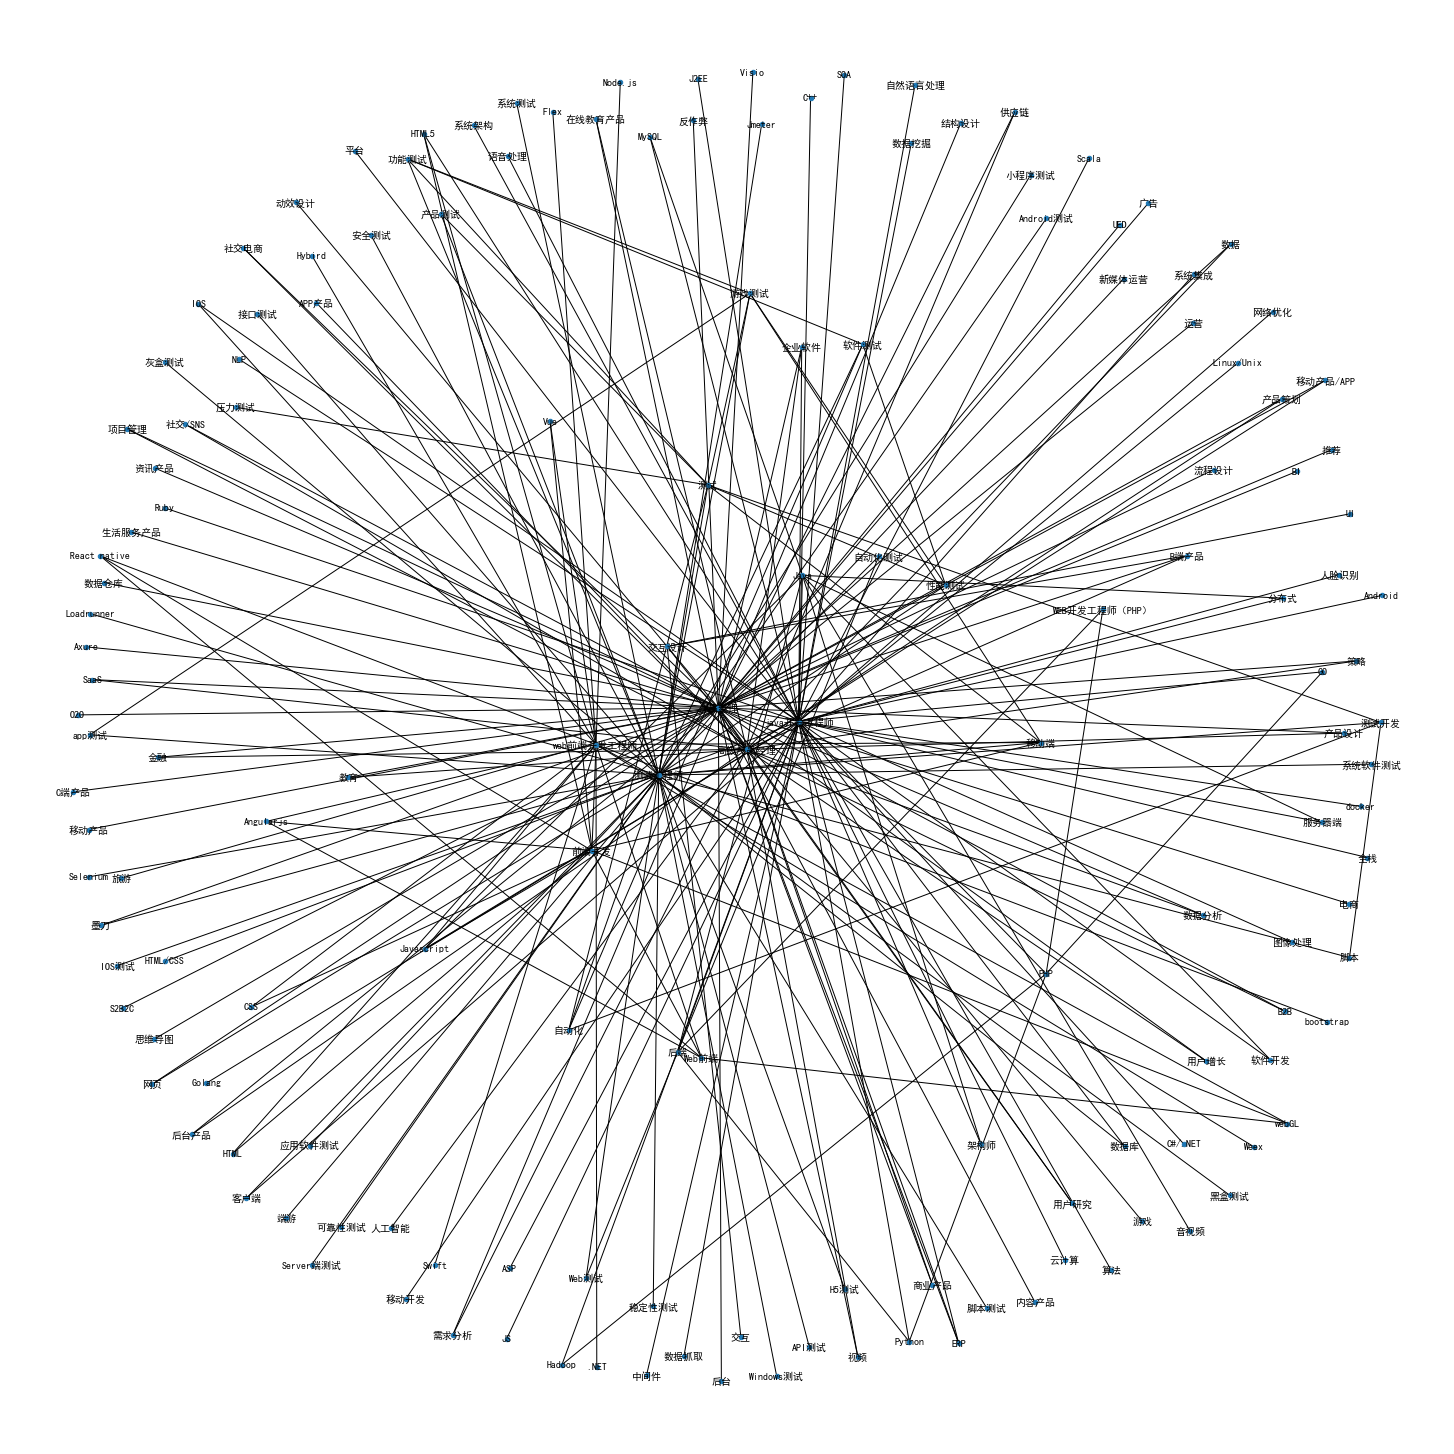

In [15]:
# 
sample_nodes_connections=sample_nodes
for p,skills in skill_position_graph.items():
    if p in sample_nodes:
        sample_nodes_connections+=skills
#抽取G中的子图
sample_graph=G.subgraph(sample_nodes_connections)
plt.figure(figsize=(20,20))
pos=nx.spring_layout(sample_graph,k=1)
nx.draw(sample_graph,pos,with_labels=True,node_size=20,font_size=10)
plt.show()

In [16]:
# 使用PageRank 算法，对核心能力和核心职位进行影响力的排序
pr=nx.pagerank(G,alpha=0.9)
ranked_position_and_ability=sorted([(name,value) for name,value in pr.items()],\
                                   key=lambda x:x[1],reverse=True)
print(ranked_position_and_ability)

[('后端', 0.026833573370768898), ('运维', 0.0191279829833669), ('Python', 0.01716937562136133), ('PHP', 0.015217301132452196), ('Java', 0.015099988114363864), ('UI', 0.013501957339680843), ('产品经理', 0.012867362096047103), ('测试', 0.012366790452249686), ('交互', 0.009849405953488204), ('MySQL', 0.00967223844507533), ('服务器端', 0.009370964487301778), ('产品设计', 0.008597505637826748), ('数据分析', 0.007174969488981874), ('前端开发', 0.00608539791307318), ('Linux', 0.005226181617999156), ('Linux/Unix', 0.0049532559996417515), ('测试开发', 0.004835194902631713), ('Javascript', 0.004783639914662887), ('视觉', 0.004716109056529597), ('java开发工程师', 0.004700067816776761), ('GO', 0.004665757462546789), ('Web前端', 0.004611833602838623), ('运维工程师', 0.0043469981091009986), ('测试工程师', 0.00431809809115629), ('ui设计师', 0.004238235625166821), ('功能测试', 0.004037991593330988), ('产品总监', 0.003940470794231084), ('Golang', 0.003927858764196972), ('自动化', 0.0038575443596511397), ('UE', 0.0037940387389006924), ('产品策划', 0.0037544411990242357),

In [20]:
# 特征X 需要去掉salary字段
x_df=df.drop(['salary'],axis=1)
# 目标 Target
target=df['salary'].tolist()
# 将x_df 内容都拼接成字符串，设置为merge字段
x_df['merged']=x_df.apply(lambda x:''.join(str(x)),axis=1)
print(x_df['merged'][0])

id                                                                   3
positionName                                                    财务产品经理
district                                                           海淀区
stationname                                                         上地
jobNature                                                           全职
companyLabelList                      ['节日礼物', '年底双薪', '定期体检', '七险一金']
industryField                                               物流丨运输,软件开发
companySize                                                  500-2000人
skillLables                                      ['产品设计', '后台', 'B2B']
createTime                                         2020-05-15 15:10:02
companyFullName                                         北京福佑多多信息技术有限公司
workYear                                                          1-3年
education                                                           本科
positionAdvantage                                     福利待遇好、创业黑马、技术氛围好
url   

In [24]:
import jieba 
import re

# 合并到一起
def get_one_row_job_string(x_string_row):
    job_string=""
    for i,element in enumerate(x_string_row.split('\n')):
        if len(element.split())==2:
            _,value=element.split()
            if i==0:
                continue
            # 只保存value
            job_string+=value
    return job_string

def token(string):
    return re.findall('\w+',string)

X_string=x_df['merged'].tolist()

cutted_x=[]
for i,row in enumerate(X_string):
    job_string=get_one_row_job_string(row)
    cutted_x.append(' '.join(list(jieba.cut(''.join(token(job_string))))))
print(cutted_x)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Administrator\AppData\Local\Temp\jieba.cache
Loading model cost 0.889 seconds.
Prefix dict has been built successfully.


['财务 产品 经理 海淀区 上 地 全职 物流 丨 运输 软件开发 5002000 人 北京 福佑 多多 信息技术 有限公司 13 年 本科 福利待遇 好 创业 黑马 技术 氛围 好 httpswwwlagoucomjobs7149613html 岗位职责 1 负责 财务 相关 业务 解决方案 架构 并 主导 与 产品 技术 等 交付 团队 的 对接 能够 从 完整 的 财务 产品线', '产品 专家 海淀区 中关村 全职 企业 服务 5002000 人 北京 拉勾 网络 技术 有限公司 510 年 本科 做好 产品 给 用户 用 httpswwwlagoucomjobs7056930html 负责 具体 产品线 的 工作 完成 用户 价值 解决 具体 产品线 的 问题 产品线 有 策略 运营 基础 产品 流程 等线 产品线', '产品 总监 海淀区 中关村 全职 企业 服务 5002000 人 北京 拉勾 网络 技术 有限公司 510 年 本科 做好 产品 给 用户 用 httpswwwlagoucomjobs6982266html 做出 好 产品 服务 用户 实现 用户 价值 B 端 产品 C 端 产品 商业 策略 产品 运营 产品 等 岗位 都 有 总 产品线', '联盟 广告 产品 运营 专家 专员 商业化 海淀区 东单 全职 文娱 丨 内容 2000 人 以上 产品 运营 北京 达佳 互联 信息技术 有限公司 510 年 不限 httpswwwlagoucomjobs7112346html 产品线', '产品 总监 海淀区 中关村 全职 移动 互联网 社交 1550 人 北京 领主 科技 有限公司 510 年 本科 发展 创新 httpswwwlagoucomjobs6864122html 产品线', '产品 总监 海淀区 中关村 全职 教育 5002000 人 北京 励立 长平 教育 科技 有限公司 510 年 本科 六险 一金 节假日 福利 生日礼品 等 httpswwwlagoucomjobs7038327html 技能 要求 B 端 产品 C 端 产品 在线教育 产品 一 岗位职责 1 负责 公司 产品 发展 方向 的 整体 把握 和 产品线', '产品 总监 海淀区 知春路 全职 电商 150500 人 北京 开心 代代 科技 有限公司 510

In [30]:
#使用TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(cutted_x)
print(X)

  (0, 4867)	0.08067382643510919
  (0, 6292)	0.20009145587805918
  (0, 8425)	0.1579560119122034
  (0, 6368)	0.17665301724378638
  (0, 5947)	0.08919099991949327
  (0, 4844)	0.18098871672173852
  (0, 4704)	0.17377734982977522
  (0, 7427)	0.12806870213260702
  (0, 8664)	0.16653746915733844
  (0, 4620)	0.0924431318382734
  (0, 7958)	0.10579206223251938
  (0, 8777)	0.0627793041108492
  (0, 6450)	0.0694001752771764
  (0, 4014)	0.2547712257295339
  (0, 7538)	0.10080943358604699
  (0, 6850)	0.07710967023957215
  (0, 9381)	0.2345227567545943
  (0, 5455)	0.17377734982977522
  (0, 8031)	0.12174170827441123
  (0, 7378)	0.032958160533437766
  (0, 30)	0.07814772806027713
  (0, 7334)	0.0310424928669057
  (0, 5205)	0.09312782800519334
  (0, 6075)	0.17767811771366668
  (0, 8028)	0.2280042057131061
  :	:
  (4509, 101)	0.07157693343910868
  (4509, 6450)	0.0664206301112013
  (4509, 7378)	0.03154317379162286
  (4509, 7334)	0.02970975113834377
  (4509, 5556)	0.035993007833540154
  (4509, 5312)	0.028616509438

In [26]:
target_numical=[np.mean(list(map(float,re.findall('\d+',s)))) for s in target]
print(target_numical)

[12.5, 40.0, 57.5, 30.0, 29.0, 40.0, 50.0, 40.0, 55.0, 40.0, 32.5, 60.0, 27.5, 27.0, 25.0, 22.5, 30.0, 20.0, 30.0, 27.5, 20.0, 20.0, 9.0, 23.5, 30.0, 32.5, 22.5, 35.0, 45.0, 35.0, 45.0, 35.0, 30.0, 37.5, 10.5, 60.0, 12.0, 45.0, 52.5, 40.0, 32.5, 10.5, 37.5, 37.5, 32.5, 12.0, 45.0, 8.0, 52.5, 30.0, 30.0, 30.0, 1.5, 27.5, 16.0, 35.0, 22.5, 32.5, 45.0, 45.0, 24.0, 60.0, 50.0, 30.0, 27.5, 15.0, 40.0, 40.0, 32.5, 40.0, 25.0, 20.0, 32.5, 45.0, 42.5, 42.5, 42.5, 65.0, 10.5, 27.5, 32.5, 42.5, 35.0, 22.5, 32.5, 30.0, 40.0, 22.5, 50.0, 37.5, 50.0, 19.0, 20.0, 40.0, 22.5, 27.5, 25.5, 30.0, 55.0, 7.0, 30.0, 12.5, 30.0, 30.0, 19.0, 28.5, 12.5, 17.5, 20.0, 60.0, 22.5, 22.0, 32.5, 37.5, 52.5, 45.0, 20.0, 11.5, 15.0, 22.5, 42.5, 30.5, 25.0, 17.5, 40.0, 40.0, 45.0, 22.5, 30.0, 4.0, 30.0, 17.0, 21.5, 30.0, 21.5, 30.0, 37.5, 22.5, 9.5, 22.5, 27.5, 30.0, 12.5, 37.5, 20.0, 25.0, 23.0, 20.0, 20.0, 22.5, 32.5, 14.5, 30.0, 20.0, 75.0, 37.5, 22.5, 15.0, 20.0, 30.0, 55.0, 22.5, 28.5, 25.0, 30.0, 20.0, 27.5, 20.

In [31]:
Y=target_numical
# 使用KNN模型
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(2)
model.fit(X,Y)

def predict_by_label(test_string,model):
    # 分词
    test_words=list(jieba.cut(test_string))
    # 转换为tfidef 向量
    test_vec=vectorizer.transform(test_words)
    # 预测
    y_predict=model.predict(test_vec)
    return y_predict[0]

In [32]:
test='测试 北京 3年 专科'
print(test,predict_by_label(test,model))

测试 北京 3年 专科 10.75


In [39]:
test='测试 北京 3年 专科'
for j in [2,3,4,5,6,7]:
    model=KNeighborsRegressor(j)
    model.fit(X,Y)
    print(j,test,predict_by_label(test,model))

2 测试 北京 3年 专科 10.75
3 测试 北京 3年 专科 10.166666666666666
4 测试 北京 3年 专科 15.125
5 测试 北京 3年 专科 14.8
6 测试 北京 3年 专科 14.583333333333334
7 测试 北京 3年 专科 16.428571428571427
